In [2]:
!pip install pandas
!pip install matplotlib
!pip install --upgrade tensorflow




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Importing necessary libraries
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()
import pandas as pd
from giza_datasets import DatasetsHub, DatasetsLoader
loader = DatasetsLoader()


# Assuming you have a function loader.load() to load data from Polar into a DataFrame
# Load data from Polar into a DataFrame
df_polar = loader.load('balancer-daily-trade-volume')

# Extracting data from the Polar DataFrame
data = {
    'day': df_polar['day'],
    'pool_id': df_polar['pool_id'],
    'blockchain': df_polar['blockchain'],
    'token_pair': df_polar['token_pair'],
    'trading_volume_usd': df_polar['trading_volume_usd']
}

# Creating a new Pandas DataFrame
df_pandas = pd.DataFrame(data)

# Display the first few rows of the Pandas DataFrame
print(df_pandas.head())


         day                                     pool_id blockchain  \
0 2024-01-17  0xeb413988a42cb359603d42bf3a6b6e5b24c69346   ethereum   
1 2024-01-01  0x92e7eb99a38c8eb655b15467774c6d56fb810bc9   ethereum   
2 2024-01-02  0x69d460e01070a7ba1bc363885bc8f4f0daa19bf5   ethereum   
3 2024-01-03  0x6c323c144a8d1748c6ca517b6c386561bfd599e3   ethereum   
4 2024-01-06  0x96d99093f22719dd06fb8db8e93779979a2acab3   ethereum   

   token_pair  trading_volume_usd  
0   SALT-WETH          691.881533  
1  FRONT-USDC        10564.961564  
2   USDC-WETH        30232.770509  
3   WBTC-WETH           23.692250  
4    RLY-WETH         1680.666629  


Missing Values:
 day                   0
pool_id               0
blockchain            0
token_pair            0
trading_volume_usd    0
dtype: int64


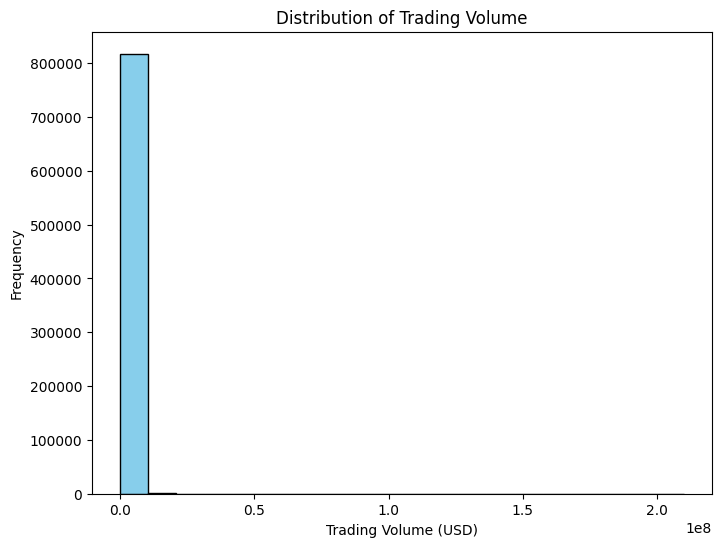

Unique Blockchains: ['ethereum' 'arbitrum' 'optimism' 'polygon' 'avalanche_c' 'base' 'gnosis']
Unique Token Pairs: ['SALT-WETH' 'FRONT-USDC' 'USDC-WETH' ... 'DAI-LUNA' 'fUSDC-USDC'
 'CREAM-CRV']


In [4]:
# Check for missing values
missing_values = df_pandas.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for outliers
import matplotlib.pyplot as plt

# Visualizing the distribution of trading volume
plt.figure(figsize=(8, 6))
plt.hist(df_pandas['trading_volume_usd'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Trading Volume')
plt.xlabel('Trading Volume (USD)')
plt.ylabel('Frequency')
plt.show()

# Check for inconsistencies (for categorical variables)
unique_blockchains = df_pandas['blockchain'].unique()
unique_token_pairs = df_pandas['token_pair'].unique()

print("Unique Blockchains:", unique_blockchains)
print("Unique Token Pairs:", unique_token_pairs)


In [5]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_pandas, columns=['blockchain', 'token_pair'])

# Display the first few rows of the DataFrame with encoded categorical variables
print(df_encoded.head())


         day                                     pool_id  trading_volume_usd  \
0 2024-01-17  0xeb413988a42cb359603d42bf3a6b6e5b24c69346          691.881533   
1 2024-01-01  0x92e7eb99a38c8eb655b15467774c6d56fb810bc9        10564.961564   
2 2024-01-02  0x69d460e01070a7ba1bc363885bc8f4f0daa19bf5        30232.770509   
3 2024-01-03  0x6c323c144a8d1748c6ca517b6c386561bfd599e3           23.692250   
4 2024-01-06  0x96d99093f22719dd06fb8db8e93779979a2acab3         1680.666629   

   blockchain_arbitrum  blockchain_avalanche_c  blockchain_base  \
0                False                   False            False   
1                False                   False            False   
2                False                   False            False   
3                False                   False            False   
4                False                   False            False   

   blockchain_ethereum  blockchain_gnosis  blockchain_optimism  \
0                 True              False         

In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Perform Min-Max scaling on numerical features
#df_encoded[['trading_volume_usd']] = min_max_scaler.fit_transform(df_encoded[['trading_volume_usd']])

# Initialize StandardScaler
standard_scaler = StandardScaler()

# Perform Standardization on numerical features
df_encoded[['trading_volume_usd']] = standard_scaler.fit_transform(df_encoded[['trading_volume_usd']])

# Display the first few rows of the DataFrame with scaled numerical features
print(df_encoded.head())


         day                                     pool_id  trading_volume_usd  \
0 2024-01-17  0xeb413988a42cb359603d42bf3a6b6e5b24c69346           -0.074093   
1 2024-01-01  0x92e7eb99a38c8eb655b15467774c6d56fb810bc9           -0.067228   
2 2024-01-02  0x69d460e01070a7ba1bc363885bc8f4f0daa19bf5           -0.053552   
3 2024-01-03  0x6c323c144a8d1748c6ca517b6c386561bfd599e3           -0.074557   
4 2024-01-06  0x96d99093f22719dd06fb8db8e93779979a2acab3           -0.073405   

   blockchain_arbitrum  blockchain_avalanche_c  blockchain_base  \
0                False                   False            False   
1                False                   False            False   
2                False                   False            False   
3                False                   False            False   
4                False                   False            False   

   blockchain_ethereum  blockchain_gnosis  blockchain_optimism  \
0                 True              False         

In [7]:
# Convert 'day' column to datetime format
df_encoded['day'] = pd.to_datetime(df_encoded['day'])

# Extract relevant features: day of the week, month, and year
df_encoded['day_of_week'] = df_encoded['day'].dt.dayofweek
df_encoded['month'] = df_encoded['day'].dt.month
df_encoded['year'] = df_encoded['day'].dt.year

# Display the updated DataFrame with the extracted features
print(df_encoded.head())


         day                                     pool_id  trading_volume_usd  \
0 2024-01-17  0xeb413988a42cb359603d42bf3a6b6e5b24c69346           -0.074093   
1 2024-01-01  0x92e7eb99a38c8eb655b15467774c6d56fb810bc9           -0.067228   
2 2024-01-02  0x69d460e01070a7ba1bc363885bc8f4f0daa19bf5           -0.053552   
3 2024-01-03  0x6c323c144a8d1748c6ca517b6c386561bfd599e3           -0.074557   
4 2024-01-06  0x96d99093f22719dd06fb8db8e93779979a2acab3           -0.073405   

   blockchain_arbitrum  blockchain_avalanche_c  blockchain_base  \
0                False                   False            False   
1                False                   False            False   
2                False                   False            False   
3                False                   False            False   
4                False                   False            False   

   blockchain_ethereum  blockchain_gnosis  blockchain_optimism  \
0                 True              False         

In [8]:
# Calculate correlation matrix
correlation_matrix = df_encoded[['day_of_week', 'month', 'year', 'trading_volume_usd']].corr()

# Print correlation matrix
print(correlation_matrix)


                    day_of_week     month      year  trading_volume_usd
day_of_week            1.000000  0.007526 -0.015593           -0.008550
month                  0.007526  1.000000 -0.257067           -0.010944
year                  -0.015593 -0.257067  1.000000           -0.000795
trading_volume_usd    -0.008550 -0.010944 -0.000795            1.000000


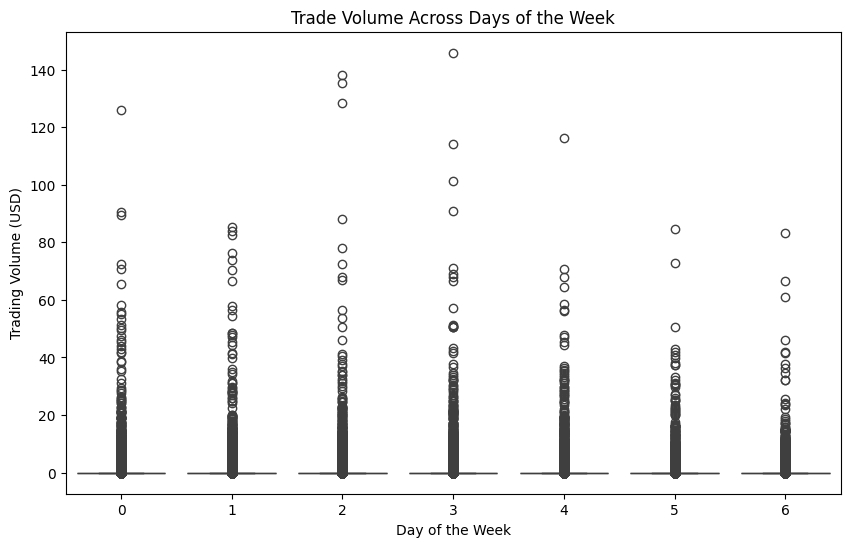

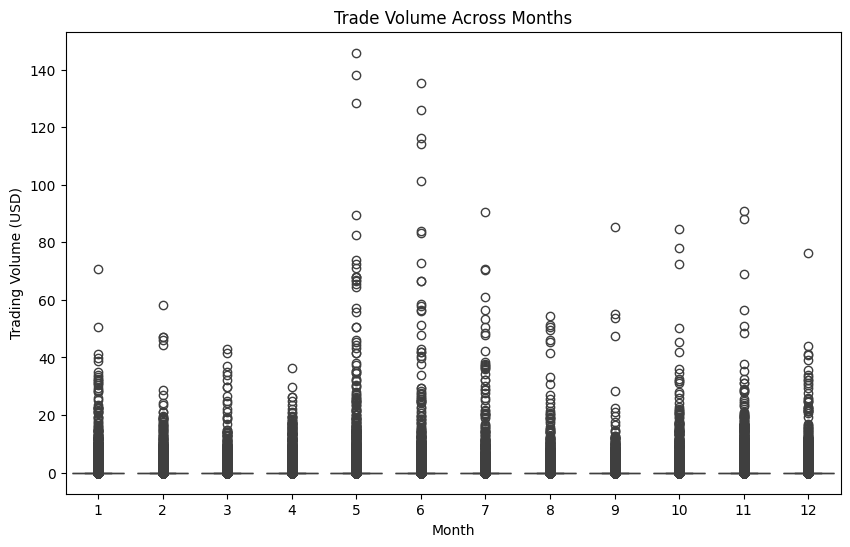

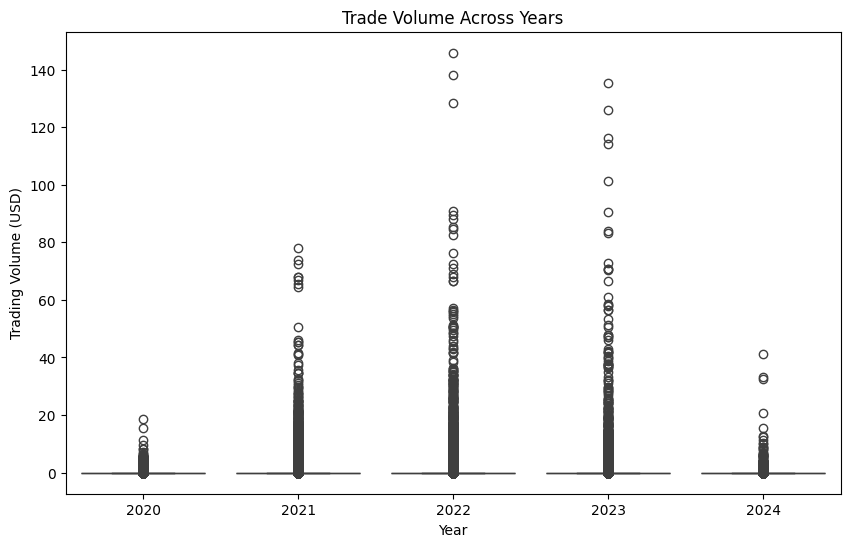

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of trade volume across different days of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='trading_volume_usd', data=df_encoded)
plt.title('Trade Volume Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Trading Volume (USD)')
plt.show()

# Boxplot of trade volume across different months
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='trading_volume_usd', data=df_encoded)
plt.title('Trade Volume Across Months')
plt.xlabel('Month')
plt.ylabel('Trading Volume (USD)')
plt.show()

# Boxplot of trade volume across different years
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='trading_volume_usd', data=df_encoded)
plt.title('Trade Volume Across Years')
plt.xlabel('Year')
plt.ylabel('Trading Volume (USD)')
plt.show()


In [10]:
df_encoded.head()

,day,pool_id,trading_volume_usd,blockchain_arbitrum,blockchain_avalanche_c,blockchain_base,blockchain_ethereum,blockchain_gnosis,blockchain_optimism,blockchain_polygon,...,token_pair_wPE-YFU,token_pair_weETH-WETH,token_pair_wstETH-YFI,token_pair_wstETH-YGG,token_pair_wstETH-wUSDM,token_pair_xSNXa-YFI,token_pair_yCURVE-YFI,day_of_week,month,year
0,2024-01-17,0xeb413988a42cb359603d42bf3a6b6e5b24c69346,-0.074093,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,2,1,2024
1,2024-01-01,0x92e7eb99a38c8eb655b15467774c6d56fb810bc9,-0.067228,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,0,1,2024
2,2024-01-02,0x69d460e01070a7ba1bc363885bc8f4f0daa19bf5,-0.053552,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,1,1,2024
3,2024-01-03,0x6c323c144a8d1748c6ca517b6c386561bfd599e3,-0.074557,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,2,1,2024
4,2024-01-06,0x96d99093f22719dd06fb8db8e93779979a2acab3,-0.073405,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,5,1,2024


In [11]:
# Check for missing values
missing_values = df_encoded.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
day                       0
pool_id                   0
trading_volume_usd        0
blockchain_arbitrum       0
blockchain_avalanche_c    0
                         ..
token_pair_xSNXa-YFI      0
token_pair_yCURVE-YFI     0
day_of_week               0
month                     0
year                      0
Length: 3805, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split

# Splitting into training and testing sets (80% train, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(df_encoded.drop(columns=['trading_volume_usd']), df_encoded['trading_volume_usd'], test_size=0.2, random_state=42)

# Splitting the training set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Checking the shapes of the resulting sets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Train set shape: (524119, 3804)
Validation set shape: (131030, 3804)
Test set shape: (163788, 3804)


In [13]:
# Define the length of the input sequences (window size)
window_size = 30  # Example: a week of historical data

# Check the shape of your dataset to determine the appropriate length
print("Shape of the dataset:", df_encoded.shape)

# Check the frequency of your time-series data
print("Frequency of time-series data:", df_encoded['day'].diff().min())

# Calculate the total number of data points
total_data_points = df_encoded.shape[0]

# Calculate the total number of sequences
total_sequences = total_data_points - window_size + 1

print("Total number of sequences:", total_sequences)


Shape of the dataset: (818937, 3805)
Frequency of time-series data: -1322 days +00:00:00
Total number of sequences: 818908


In [14]:
import numpy as np

# Select only necessary columns from the DataFrame
selected_columns = ['trading_volume_usd', 'blockchain_arbitrum', 'blockchain_avalanche_c', 'blockchain_base', 'blockchain_ethereum', 'blockchain_gnosis', 'blockchain_optimism', 'blockchain_polygon', 'token_pair_wstETH-wUSDM', 'token_pair_xSNXa-YFI', 'token_pair_yCURVE-YFI', 'day_of_week', 'month', 'year']
df_selected = df_encoded[selected_columns]

# Define the length of the input sequences (window size)
window_size = 30  # Example: a week of historical data

# Slide a window of this length across your time-series data
sequences_input = []
sequences_target = []

for i in range(total_sequences):
    # Extract the historical data points as the input sequence
    input_sequence = df_selected.iloc[i : i + window_size].values
    sequences_input.append(input_sequence)
    
    # Extract the next data point as the target for prediction
    target = df_selected.iloc[i + window_size - 1, 2]  
    sequences_target.append(target)

# Convert lists to numpy arrays
sequences_input = np.array(sequences_input)
sequences_target = np.array(sequences_target)

# Check the shape of input and target sequences
print("Shape of input sequences:", sequences_input.shape)
print("Shape of target sequences:", sequences_target.shape)


Shape of input sequences: (818908, 30, 14)
Shape of target sequences: (818908,)


In [1]:
# Reshape the target sequences to match the shape of the input sequences
sequences_target = sequences_target.reshape(-1, 1)

NameError: name 'sequences_target' is not defined

In [16]:
columns = df_encoded.columns

# Find the position of a specific column label, for example 'trading_volume_usd'
position = columns.get_loc('trading_volume_usd')

print("Position of 'trading_volume_usd':", position)

Position of 'trading_volume_usd': 2


In [17]:
sequences_target

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [18]:
# Verify the shapes
print("Shape of input sequences:", sequences_input.shape)
print("Shape of target sequences:", sequences_target.shape)

Shape of input sequences: (818908, 30, 14)
Shape of target sequences: (818908, 1)


In [19]:
print("Data type of sequences_input:", sequences_input.dtype)

Data type of sequences_input: object


In [20]:
print("Data type of sequences_target:", sequences_target.dtype)

Data type of sequences_target: bool


In [21]:
sequences_input = sequences_input.astype(np.float32)
sequences_target = sequences_target.astype(np.float32)

In [22]:
import numpy as np
from tensorflow.keras.utils import Sequence
import tensorflow.compat.v1 as tf

# Use tf.compat.v1.losses.sparse_softmax_cross_entropy instead of tf.losses.sparse_softmax_cross_entropy
#loss = tf.compat.v1.losses.sparse_softmax_cross_entropy(labels, logits)


class DataGenerator(Sequence):
    def __init__(self, sequences_input, sequences_target, batch_size):
        self.sequences_input = sequences_input
        self.sequences_target = sequences_target
        self.batch_size = batch_size

    def __len__(self):
        return len(self.sequences_input) // self.batch_size

    def __getitem__(self, idx):
        batch_inputs = self.sequences_input[idx * self.batch_size : (idx + 1) * self.batch_size]
        batch_targets = self.sequences_target[idx * self.batch_size : (idx + 1) * self.batch_size]
        return np.array(batch_inputs), np.array(batch_targets)

# Example usage:
batch_size = 32
data_generator =DataGenerator(sequences_input, sequences_target, batch_size)


In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Activation, Add
from tensorflow.keras.regularizers import l2

def residual_block(x, filters, kernel_size, dilation_rate):
    # Dilated causal convolution
    conv = Conv1D(filters=filters, kernel_size=kernel_size, dilation_rate=dilation_rate, padding='causal')(x)
    conv = Activation('relu')(conv)
    
    # 1x1 convolution to adjust the number of filters
    conv = Conv1D(filters=filters, kernel_size=1)(conv)
    
    # Skip connection
    x = Add()([x, conv])
    return x

def build_wavenet(input_shape, num_filters, num_blocks, kernel_size, num_classes):
    inputs = Input(shape=input_shape)
    
    # Initial convolution block
    x = Conv1D(filters=num_filters, kernel_size=1, padding='causal')(inputs)
    
    # Dilated causal convolutions
    for i in range(num_blocks):
        dilation_rate = 2 ** i
        x = residual_block(x, num_filters, kernel_size, dilation_rate)
    
    # Output layer
    outputs = Conv1D(filters=num_classes, kernel_size=1, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

# Define model hyperparameters
selected_columns = ['trading_volume_usd', 'blockchain_arbitrum', 'blockchain_avalanche_c', 'blockchain_base', 'blockchain_ethereum', 'blockchain_gnosis', 'blockchain_optimism', 'blockchain_polygon', 'token_pair_wstETH-wUSDM', 'token_pair_xSNXa-YFI', 'token_pair_yCURVE-YFI', 'day_of_week', 'month', 'year']
window_size = 30
input_shape = (window_size, len(selected_columns))
num_filters = 32
num_blocks = 5
kernel_size = 8
num_classes = 1  # Assuming regression task, change to number of classes for classification task

# Build the WaveNet model
model = build_wavenet(input_shape, num_filters, num_blocks, kernel_size, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print model summary
model.summary()

data_generator = DataGenerator(sequences_input, sequences_target, batch_size)

# Train the model using the fit method
model.fit(data_generator, epochs=30)

# Evaluate the model
test_loss, test_mae = model.evaluate(data_generator)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 14)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 30, 32)               480       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 30, 32)               8224      ['conv1d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 30, 32)               0         ['conv1d_1[0][0]']            
                                                                                            

KeyboardInterrupt: 

In [24]:
print(X_val)

              day                                     pool_id  \
606763 2020-07-20  0x594415978a756c5b02eabdff98d867cdda65e888   
677956 2021-04-11  0x99e582374015c1d2f3c0f98d0763b4b1145772b7   
790580 2022-09-17  0x9e7fd25ad9d97f1e6716fa5bb04749a4621e892d   
359864 2022-01-26  0x702605f43471183158938c1a3e5f5a359d7b31ba   
685023 2020-11-13  0xe5d1fab0c5596ef846dcc0958d6d0b20e1ec4498   
...           ...                                         ...   
767656 2021-12-27  0x47ebc05bc9476c9ae36679fbc3cd7bbc83a65190   
813186 2023-12-09  0x89b753153678bc434c610b7e9182297cada8ff29   
816460 2021-03-13  0x55353cbadda8fd525f0e6f307b3527d518416700   
448119 2022-03-17  0xb70c25d96ef260ea07f650037bf68f5d6583885e   
722915 2021-03-31  0xd79d825c3022e641368e77b3883c14d86694dd69   

        blockchain_arbitrum  blockchain_avalanche_c  blockchain_base  \
606763                False                   False            False   
677956                False                   False            False   
790

In [25]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Generate random input data similar to X_val
def generate_random_input_data(num_samples):
    # Define the columns
    columns = ['day', 'pool_id'] + ['blockchain_' + str(i) for i in range(10)] + ['token_pair_' + str(i) for i in range(10)] + ['day_of_week', 'month', 'year']
    
    # Generate random data
    random_data = []
    for _ in range(num_samples):
        # Generate random date
        start_date = datetime(2020, 1, 1)
        end_date = datetime(2024, 12, 31)
        random_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
        
        # Generate random pool ID
        pool_id = '0x' + ''.join(random.choices('0123456789abcdef', k=40))
        
        # Generate random blockchain and token pair values
        blockchain_values = [random.choice([True, False]) for _ in range(10)]
        token_pair_values = [random.choice([True, False]) for _ in range(10)]
        
        # Generate random day of week, month, and year
        day_of_week = random.randint(0, 6)
        month = random.randint(1, 12)
        year = random.randint(2020, 2024)
        
        # Append to random data list
        random_data.append([random_date, pool_id] + blockchain_values + token_pair_values + [day_of_week, month, year])
    
    # Create DataFrame
    df_random = pd.DataFrame(random_data, columns=columns)
    
    return df_random

# Number of random samples to generate
num_samples = 10  # Adjust as needed

# Generate random input data
random_input_data = generate_random_input_data(num_samples)

# Display the random input data
print(random_input_data)


         day                                     pool_id  blockchain_0  \
0 2024-08-25  0xaa201b5690272b9d1c1de234e695f3e53b182bc3         False   
1 2021-11-20  0x3fa2ec51cdf578d69268ad8f3bbb0e3cb870ccef         False   
2 2020-10-03  0x297e2fb21c65d5e0f09f76f087ce0b94896ce54a         False   
3 2022-05-18  0x6ef641786628a490b58a36e6c1cf68253a83408b         False   
4 2020-03-25  0xfe42e89a59eac723d79f4070dff14b1d46967d9c          True   
5 2022-07-10  0xda60aa4121acc5bd326d90fc81ab69d3c96c5a41          True   
6 2024-08-30  0x4575913462f9e387b928091527d55e2cce9738ab         False   
7 2024-06-05  0x82e9b82bac0a5afa29834ef14270872e1160efac         False   
8 2021-01-01  0x38246226027b1c59e030e5b1bacb3194c9a233d0          True   
9 2021-11-13  0x05205cff14dc4c4c2ab71327b8fcb2967ab5ce5e          True   

   blockchain_1  blockchain_2  blockchain_3  blockchain_4  blockchain_5  \
0          True          True          True          True         False   
1         False          True      